# 02 - Clustering


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

# Apply the default theme
sns.set_theme()

In [2]:
# import track data
df = pd.read_csv("./data/playlist_tracks.csv")
playlist_data = pd.read_csv("./data/playlists.csv")

# merging the playlist info
df = df.merge(playlist_data, on="playlist_url")
df.head()

,preview_url,available_markets,explicit,type,episode,track,album,artists,disc_number,track_number,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,https://p.scdn.co/mp3-preview/5f331286613eba71...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-5.894,0,0.0402,0.0459,0.852,0.0691,0.960,123.009,4,Lofi House
1,https://p.scdn.co/mp3-preview/b0eb532193111646...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.892,0,0.0707,0.0405,0.916,0.1020,0.646,117.018,4,Lofi House
2,https://p.scdn.co/mp3-preview/2ec7f3fa967937a1...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-7.570,0,0.0462,0.0237,0.731,0.5930,0.641,121.993,4,Lofi House
3,https://p.scdn.co/mp3-preview/2184855d4a8ff5fa...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-15.531,1,0.0282,0.3210,0.954,0.0822,0.171,132.986,4,Lofi House
4,https://p.scdn.co/mp3-preview/ddbaa2baf5d69d28...,"['AR', 'AU', 'AT', 'BE', 'BO', 'BR', 'BG', 'CA...",False,track,False,True,"{'available_markets': ['AR', 'AU', 'AT', 'BE',...",[{'external_urls': {'spotify': 'https://open.s...,1,1,...,-9.515,1,0.0472,0.1400,0.867,0.1460,0.418,126.027,4,Lofi House


In [3]:
# number of playlist
print("Number of playlists:", df["playlist_id"].nunique())

# number of tracks
print("Number of tracks:", df["id"].nunique())

Number of playlists: 4
Number of tracks: 435


## Preprocessing


In [4]:
# extracting meanginful features
df = df[
    [
        "duration_ms",
        "popularity",
        "danceability",
        "energy",
        "key",
        "loudness",
        "mode",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "liveness",
        "valence",
        "tempo",
        "time_signature",
        "playlist_name",
    ]
]
df

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,381864,48,0.716,0.6450,11,-5.894,0,0.0402,0.0459,0.8520,0.0691,0.960,123.009,4,Lofi House
1,160301,46,0.817,0.4780,6,-7.892,0,0.0707,0.0405,0.9160,0.1020,0.646,117.018,4,Lofi House
2,367362,45,0.887,0.8230,5,-7.570,0,0.0462,0.0237,0.7310,0.5930,0.641,121.993,4,Lofi House
3,355488,43,0.481,0.3890,11,-15.531,1,0.0282,0.3210,0.9540,0.0822,0.171,132.986,4,Lofi House
4,333772,41,0.615,0.6480,2,-9.515,1,0.0472,0.1400,0.8670,0.1460,0.418,126.027,4,Lofi House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,158607,33,0.708,0.1880,0,-19.226,1,0.0504,0.9070,0.9020,0.1060,0.469,76.522,4,Summer Jazz
431,193962,28,0.571,0.4220,9,-12.911,0,0.0268,0.9230,0.9480,0.1150,0.516,83.204,4,Summer Jazz
432,217798,41,0.584,0.1390,5,-11.483,1,0.0304,0.9610,0.0369,0.1060,0.240,106.759,4,Summer Jazz
433,290709,48,0.449,0.1420,10,-18.201,1,0.0421,0.9450,0.9140,0.1110,0.131,112.211,4,Summer Jazz


In [5]:
# Selecting the relevant audio features
features = [
    "duration_ms",
    "popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# saving to a dataframe
df_scaled = pd.DataFrame(X, columns=features)

# saving the playlist name as label
df_scaled["playlist_name"] = df["playlist_name"]

df_scaled

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name
0,2.721228,0.180401,1.037271,0.335744,1.741530,0.812843,-1.140871,-0.591828,-0.849515,1.037380,-0.816690,2.933213,0.185679,0.348463,Lofi House
1,-1.074597,-0.000624,1.641600,-0.166179,0.238424,0.489300,-1.140871,-0.226096,-0.861775,1.190890,-0.562479,1.437355,-0.007466,0.348463,Lofi House
2,2.472780,-0.091137,2.060442,0.870728,-0.062197,0.541443,-1.140871,-0.519881,-0.899918,0.747149,3.231368,1.413536,0.152924,0.348463,Lofi House
3,2.269354,-0.272162,-0.368842,-0.433671,1.741530,-0.747707,0.876523,-0.735723,-0.224932,1.282037,-0.715469,-0.825487,0.507330,0.348463,Lofi House
4,1.897314,-0.453188,0.432941,0.344761,-0.964061,0.226483,0.876523,-0.507890,-0.635872,1.073359,-0.222501,0.351191,0.282977,0.348463,Lofi House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,-1.103619,-1.177290,0.989403,-1.037781,-1.565303,-1.346050,0.876523,-0.469518,1.105516,1.157310,-0.531572,0.594149,-1.313026,0.348463,Summer Jazz
431,-0.497916,-1.629854,0.169669,-0.334488,1.140287,-0.323442,-1.140871,-0.752511,1.141842,1.267645,-0.462031,0.818051,-1.097603,0.348463,Summer Jazz
432,-0.089556,-0.453188,0.247454,-1.185052,-0.062197,-0.092202,0.876523,-0.709342,1.228117,-0.917721,-0.531572,-0.496779,-0.338208,0.348463,Summer Jazz
433,1.159558,0.180401,-0.560313,-1.176036,1.440908,-1.180069,0.876523,-0.569045,1.191791,1.186093,-0.492938,-1.016042,-0.162440,0.348463,Summer Jazz


In [6]:
from sklearn.cluster import KMeans

# the elbow method with WSS
inertia = []
cluster_range = range(1, 40)
for n_clusters in tqdm(cluster_range):
    # creating KMeans instance
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # fitting the model
    kmeans.fit(df_scaled.drop("playlist_name", axis=1))

    # saving to inertia
    inertia.append(kmeans.inertia_)

  0%|          | 0/39 [00:00<?, ?it/s]

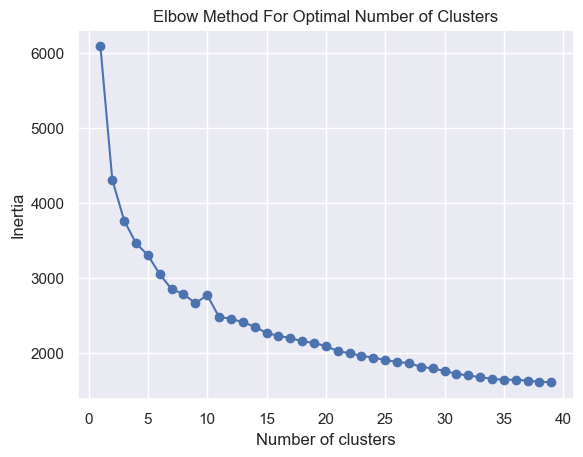

In [7]:
# Plot the inertia to find the elbow
plt.plot(cluster_range, inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal Number of Clusters")
plt.show()

In [8]:
# we're gonna go with 5, it's a good inflection point and it's interesting to see how well we can rebuild the 5 initial playlists
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_pred = kmeans.fit_predict(df_scaled.drop("playlist_name", axis=1))
df_scaled["cluster"] = cluster_pred
df_scaled

,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,playlist_name,cluster
0,2.721228,0.180401,1.037271,0.335744,1.741530,0.812843,-1.140871,-0.591828,-0.849515,1.037380,-0.816690,2.933213,0.185679,0.348463,Lofi House,4
1,-1.074597,-0.000624,1.641600,-0.166179,0.238424,0.489300,-1.140871,-0.226096,-0.861775,1.190890,-0.562479,1.437355,-0.007466,0.348463,Lofi House,4
2,2.472780,-0.091137,2.060442,0.870728,-0.062197,0.541443,-1.140871,-0.519881,-0.899918,0.747149,3.231368,1.413536,0.152924,0.348463,Lofi House,4
3,2.269354,-0.272162,-0.368842,-0.433671,1.741530,-0.747707,0.876523,-0.735723,-0.224932,1.282037,-0.715469,-0.825487,0.507330,0.348463,Lofi House,4
4,1.897314,-0.453188,0.432941,0.344761,-0.964061,0.226483,0.876523,-0.507890,-0.635872,1.073359,-0.222501,0.351191,0.282977,0.348463,Lofi House,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,-1.103619,-1.177290,0.989403,-1.037781,-1.565303,-1.346050,0.876523,-0.469518,1.105516,1.157310,-0.531572,0.594149,-1.313026,0.348463,Summer Jazz,3
431,-0.497916,-1.629854,0.169669,-0.334488,1.140287,-0.323442,-1.140871,-0.752511,1.141842,1.267645,-0.462031,0.818051,-1.097603,0.348463,Summer Jazz,1
432,-0.089556,-0.453188,0.247454,-1.185052,-0.062197,-0.092202,0.876523,-0.709342,1.228117,-0.917721,-0.531572,-0.496779,-0.338208,0.348463,Summer Jazz,3
433,1.159558,0.180401,-0.560313,-1.176036,1.440908,-1.180069,0.876523,-0.569045,1.191791,1.186093,-0.492938,-1.016042,-0.162440,0.348463,Summer Jazz,3


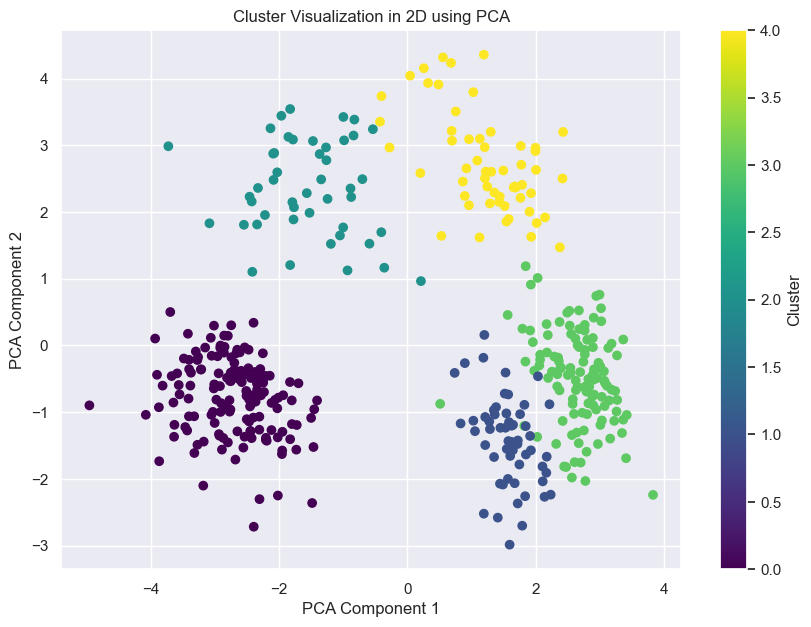

In [9]:
# quick visualization with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled.drop("playlist_name", axis=1))

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled["cluster"], cmap="viridis")
plt.title("Cluster Visualization in 2D using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

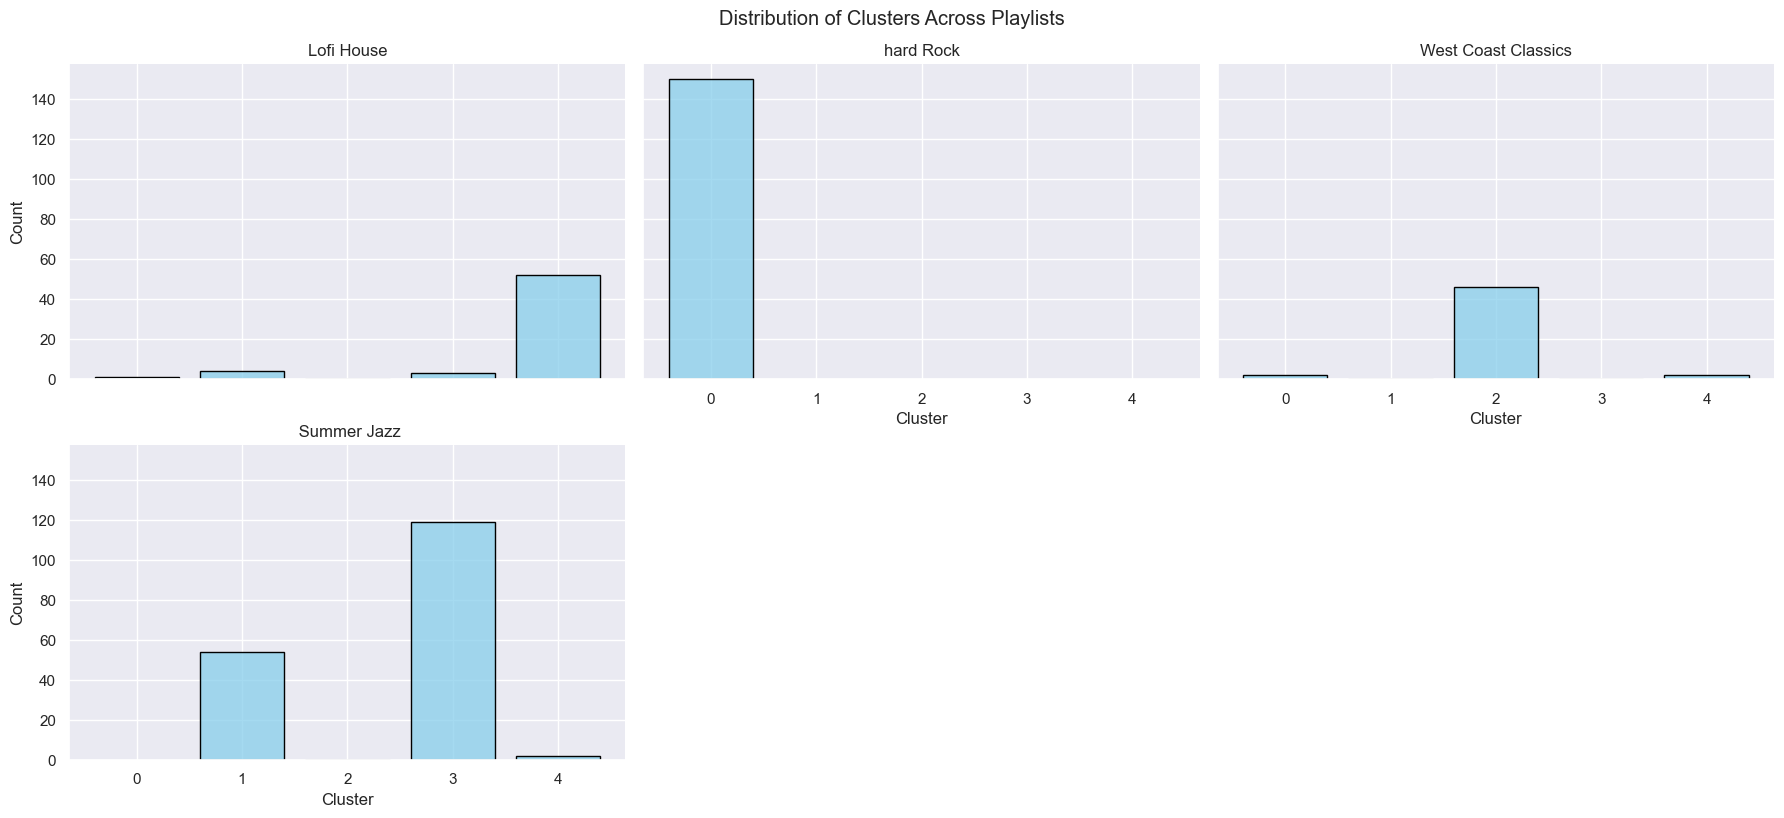

In [12]:
# let's plot the distribution of the clusters for each playlist
g = sns.FacetGrid(df_scaled, col="playlist_name", col_wrap=3, height=4, aspect=1.5)

# Map the histplot to each facet
g.map(
    sns.histplot,
    "cluster",
    discrete=True,
    shrink=0.8,
    stat="count",
    color="skyblue",
    edgecolor="black",
)

# Add titles and adjust the layout
g.set_axis_labels("Cluster", "Count")
g.set_titles("{col_name}")
g.figure.suptitle("Distribution of Clusters Across Playlists", y=1.02)

# Adjust x-axis ticks to show only integer values
for ax in g.axes.flat:
    ax.set_xticks(range(df_scaled["cluster"].nunique()))

plt.show()

This little example shows that using audio features exlusively is not enough to clearly identify category of track and select for playlist
